<a href="https://colab.research.google.com/github/Jvargas442/Ciencia-de-datos/blob/main/Ciencia_de_datos_Estimaci%C3%B3n_de_la_variabilidads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajando con medida centrales
###1. Cómo analizar dataframes
###2. Overview de los datos
###3. Obtener las medidas entrales
###4. Analizar gráficas

In [13]:
!pip install statsmodels

In [14]:
!pip install wquantiles

##1. Analizando dataframes

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt


In [16]:
estado=pd.read_csv("/Viral_Social_Media_Trends.csv")

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#Ver los primeros 5 registros
estado.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [19]:
#Ver los últimos 4 registros
estado.tail(4)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low
4999,Post_5000,Instagram,#Fashion,Reel,Japan,2224007,72744,29945,46381,Low


In [20]:
#Ver un muestreo de 10 registros(aleatorios)
estado.sample(10)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
3923,Post_3924,YouTube,#Music,Shorts,Brazil,2793980,105510,61565,11195,Medium
4219,Post_4220,TikTok,#Tech,Video,Brazil,3545322,276967,4261,27752,Low
2419,Post_2420,YouTube,#Fashion,Live Stream,Germany,3801329,179214,62593,37675,Low
1458,Post_1459,TikTok,#Fashion,Live Stream,UK,2133430,479806,15065,12873,High
37,Post_38,Instagram,#Dance,Video,India,1367820,10794,7617,36639,Medium
1281,Post_1282,Twitter,#Viral,Live Stream,Australia,280264,24388,40754,36005,Low
201,Post_202,YouTube,#Fashion,Video,Germany,3186810,312491,66586,7390,Medium
1844,Post_1845,TikTok,#Tech,Shorts,Canada,3139776,138605,20376,44725,Medium
1673,Post_1674,Instagram,#Fashion,Tweet,USA,4330176,205339,6335,41452,Low
963,Post_964,TikTok,#Fashion,Live Stream,UK,1518152,92660,60723,46917,Low


Las gráficas representan distintas métricas de interacción en publicaciones de redes sociales como TikTok, Instagram, Twitter y YouTube. Se incluyen variables clave como el número de vistas, "Likes", compartidos y comentarios, así como el tipo de contenido y la región en la que fue publicado.

Uno de los aspectos más destacados es la gran variabilidad en el nivel de interacción, lo que sugiere que algunos contenidos logran captar una audiencia masiva mientras que otros tienen un impacto más limitado. Esto puede depender de factores como la plataforma utilizada, el tipo de contenido, y el hashtag asociado a la publicación.

In [21]:
estado.columns

Index(['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views',
       'Likes', 'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')

In [22]:
list(estado.columns) #Convertit en lista los nombres de las columnas

['Post_ID',
 'Platform',
 'Hashtag',
 'Content_Type',
 'Region',
 'Views',
 'Likes',
 'Shares',
 'Comments',
 'Engagement_Level']

In [23]:
estado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [24]:
estado.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [25]:
estado["Views"].mean()

np.float64(2494066.444)

In [26]:
trim_mean(estado.Views, 0.1)

np.float64(2493855.26825)

In [27]:
np.average(estado['Likes'],weights=estado.Views)

np.float64(251206.7383304692)

La tabla muestra un resumen estadístico de las métricas de interacción en redes sociales, como vistas, Likes, compartidos y comentarios. Con 5,000 registros. En promedio, una publicación tiene 2.49 millones de vistas y 251,475 Likes, aunque la gran dispersión de los datos indica que hay contenidos extremadamente virales y otros con escaso impacto. La publicación más exitosa logró casi 5 millones de vistas y 500,000 Likes, mientras que otras apenas superaron unas pocas centenas.

La distribución de los datos muestra que solo el 25% de las publicaciones más populares superan los 3.75 millones de vistas y los 373,970 Likes. Aunque algunas publicaciones generan una gran interacción, la mayoría se mantiene en un rango más moderado.


<Axes: >

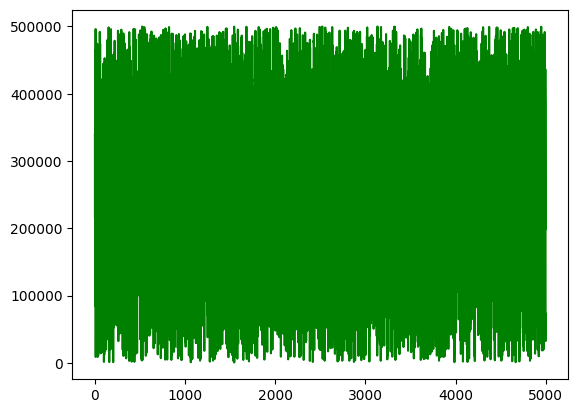

In [28]:
estado["Likes"].plot.line(color="green")

<Axes: >

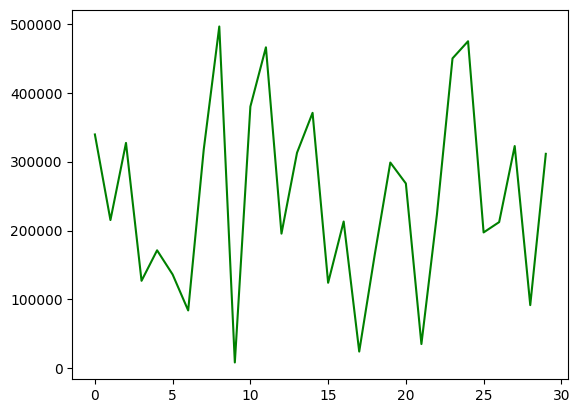

In [29]:
estado["Likes"].head(30).plot.line(color="green")

Las gráficas muestran la variabilidad en la cantidad de "Likes" recibidos en publicaciones de redes sociales. La primera, que incluye los 5,000 registros, refleja una distribución densa y dispersa, lo que sugiere que algunas publicaciones alcanzan un alto nivel de interacción mientras que otras reciben pocos "Likes". Sin embargo, la gran cantidad de datos dificulta la identificación de patrones claros. En contraste, la segunda gráfica, que solo muestra las primeras 30 publicaciones, permite visualizar mejor las fluctuaciones individuales y facilita la interpretación de la dinámica de interacción en menor escala.

In [30]:
print(estado.index)

RangeIndex(start=0, stop=5000, step=1)


<Axes: >

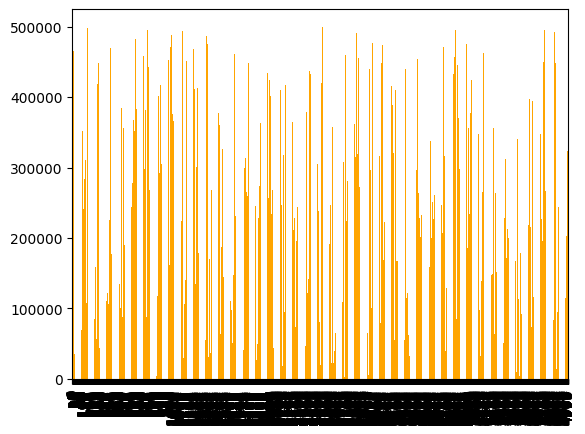

In [31]:
estado["Likes"].plot.bar(color="orange")

<Axes: >

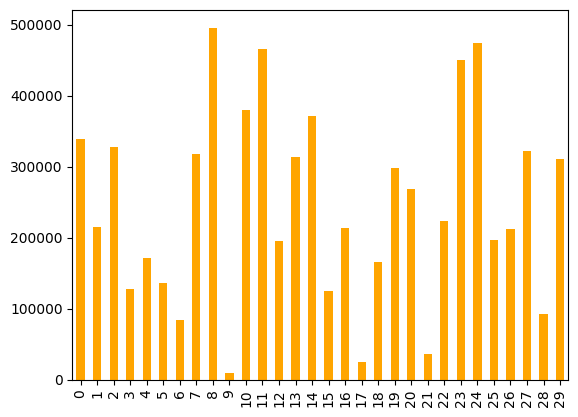

In [32]:
estado["Likes"].head(30).plot.bar(color="orange")

Las gráficas representan la distribución de "Likes" en publicaciones de redes sociales utilizando diagramas de barras. La primera gráfica, que muestra solo los primeros 30 registros, permite visualizar con claridad las diferencias en la cantidad de interacciones entre publicaciones individuales. Se observa que algunas publicaciones reciben significativamente más "Likes" que otras, con variaciones marcadas en el nivel de engagement.

En contraste, la segunda gráfica, que abarca la totalidad de los datos, se vuelve difícil de interpretar debido a la gran cantidad de barras, lo que provoca una sobrecarga visual y dificulta la identificación de patrones específicos. Aunque refleja la variabilidad de los datos en su conjunto, la saturación de información hace que sea menos efectiva para el análisis detallado de cada publicación.

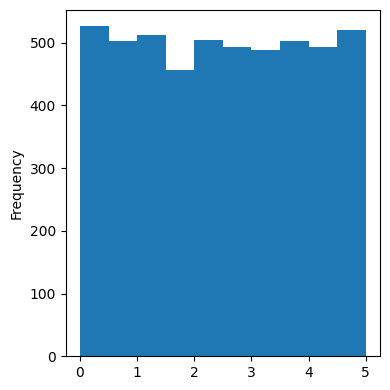

In [33]:
ax=(estado.Views/1_000_000).plot.hist(figsize=(4,4))
ax.set_label("Views")
plt.tight_layout()
plt.show()

La gráfica muestra un histograma de la cantidad de vistas en publicaciones de redes sociales, normalizado en millones para facilitar la interpretación. Se observa una distribución relativamente uniforme, lo que indica que los valores de vistas están bastante dispersos en el dataset y no hay una concentración clara en un rango específico.

Este tipo de distribución sugiere que las publicaciones pueden recibir desde un número relativamente bajo hasta varios millones de vistas sin que haya una fuerte predominancia de valores intermedios. Aunque esto refleja la variabilidad en el alcance de las publicaciones, un análisis más detallado podría ayudar a identificar factores que influyen en la viralidad y en la distribución de la atención en diferentes plataformas.

In [34]:
estado["Likes"].std()

144349.58338434075

In [37]:
mayor_likes= estado.groupby(["Likes"])["Platform"].max()

In [38]:
mayor_likes

,Platform
Likes,
490,YouTube
804,Twitter
876,Twitter
957,Twitter
968,YouTube
...,...
499664,Instagram
499704,YouTube
499745,TikTok


In [40]:
estado.Likes.quantile(0.75)-estado.Likes.quantile(0.25)

np.float64(247078.5)

In [43]:
import statsmodels.robust.scale as robust
robust.mad(estado.Likes)

np.float64(182748.5146574375)

In [44]:
estado["Views"].quantile([0.05,0.25,0.75,0.95])

,Views
0.05,233326.25
0.25,1186207.25
0.75,3759781.00
0.95,4754538.25


Text(0, 0.5, 'Likes en millones')

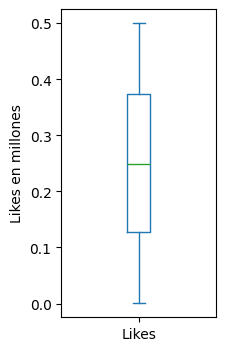

In [48]:
ax=(estado.Likes/1_000_000).plot.box(figsize=(2,4))
ax.set_ylabel("Likes en millones")

In [49]:
binnedPopulation=pd.cut(estado["Likes"],10)
binnedPopulation.value_counts()

,count
Likes,
"(200262.8, 250206.0]",549
"(300149.2, 350092.4]",530
"(400035.6, 449978.8]",507
"(449978.8, 499922.0]",500
"(350092.4, 400035.6]",498
"(-9.432, 50433.2]",497
"(50433.2, 100376.4]",496
"(150319.6, 200262.8]",491
"(100376.4, 150319.6]",475


Text(0, 0.5, 'Likes en millones')

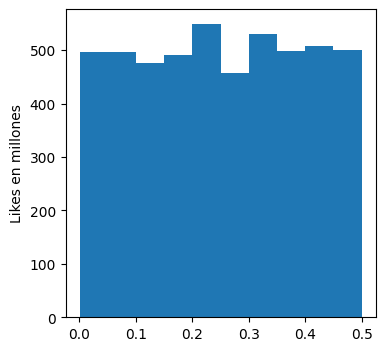

In [50]:
ax=(estado.Likes/1_000_000).plot.hist(figsize=(4,4))
ax.set_ylabel("Likes en millones")

In [57]:
estado.columns

Index(['Post_ID', 'Platform', 'Hashtag', 'Content_Type', 'Region', 'Views',
       'Likes', 'Shares', 'Comments', 'Engagement_Level'],
      dtype='object')

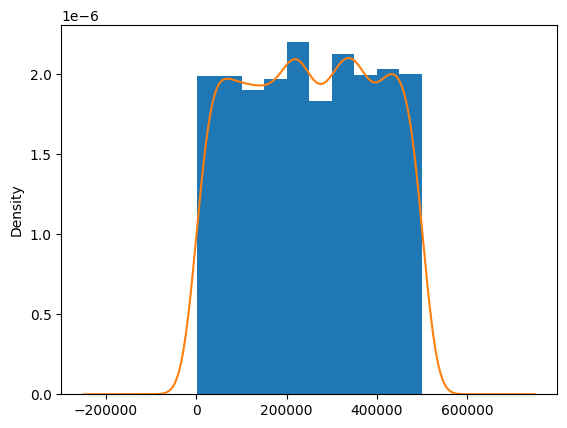

In [60]:
ax=estado["Likes"].plot.hist(density=True)
estado["Likes"].plot.density(ax=ax)
ax.set_label("Likes")

## Sobre Estimaciones de variabilidad
1. La desviación estándar es más sensible a los valores atípicos que la MAD. La MAD es una medida de dispersión más robusta, es decir, menos afectada por valores extremos. Por lo tanto, si la desviación estándar es mucho mayor, es una señal de que hay valores atípicos influyendo en la dispersión de los datos.

2. Identificar y analizar los valores atípicos en la columna "Likes". Decide si son errores de datos o si representan un comportamiento real. Si son errores, puedes corregirlos o eliminarlos. Si son reales, debes considerar si son relevantes para tu análisis.

3. El IQR representa la dispersión del 50% central de los datos. Un IQR grande indica que los datos están más dispersos en el centro, mientras que un IQR pequeño indica que los datos están más concentrados. Es menos sensible a los valores atípicos que la desviación estándar, por lo que es una buena medida de dispersión cuando hay valores extremos.

##Sobre exploración en distribución de datos
1. En el código. Los percentiles dan una idea de la distribución de los "Likes". Por ejemplo, el percentil 95 indica que el 95% de las publicaciones tienen menos de esa cantidad de "Likes".

2. El diagrama de cajas muestra la distribución de la población en millones, revelando que la mayoría de los estados tienen poblaciones relativamente bajas, concentradas entre 2 y 7 millones, con una mediana alrededor de 4 millones, mientras que existen tres valores atípicos que representan estados con poblaciones significativamente mayores, superando los 20 millones.

3.
